In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('algerian_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# drop month date, month, year
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()    

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
## diving into independent and dependent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [12]:
## train test spli
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [14]:
# feature selection based on corrreleation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

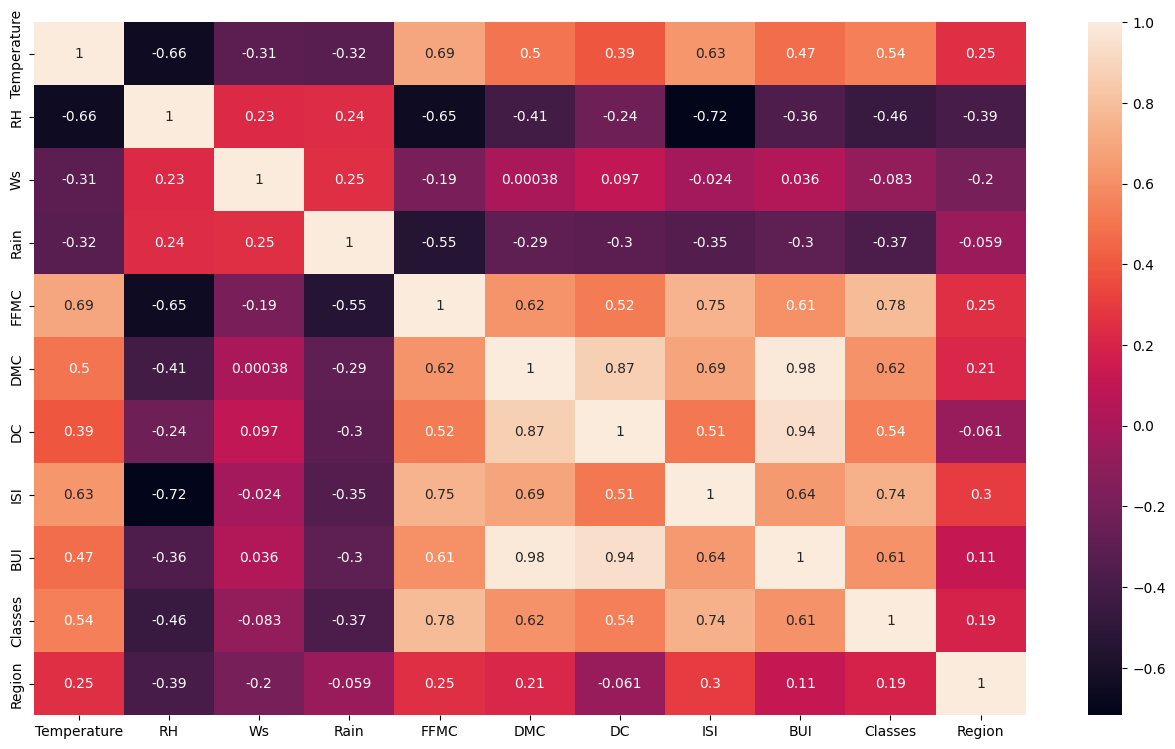

In [15]:
## check for multi collinearity
plt.figure(figsize=(16,9))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [16]:
def correleation(dataset,thresold):
    corr_col=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>thresold):
                colname=corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

In [17]:
## thresold -- domain exxpertise
corr_features=correleation(x_train,0.85)

In [18]:
corr_features

{'BUI', 'DC'}

In [19]:
## drop aboc=ve features when corr is more than thresold
x_train.drop(corr_features,inplace=True,axis=1)
x_test.drop(corr_features,inplace=True,axis=1)


In [20]:
x_test.shape,x_train.shape

((61, 9), (182, 9))

In [43]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15.0,0.0,86.7,14.2,5.7,1,0
6,33,54,13.0,0.0,88.2,9.9,6.4,1,0
152,28,58,18.0,2.2,63.7,3.2,1.2,0,1
232,34,58,13.0,0.2,79.5,18.7,2.1,0,1
238,30,65,14.0,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15.0,2.9,74.8,7.1,1.6,0,1
178,33,57,16.0,0.0,87.5,15.7,6.7,1,1
224,31,72,14.0,0.0,84.2,8.3,3.8,1,1
230,36,33,13.0,0.1,90.6,25.8,9.0,1,1


In [21]:
## feature scaling or standardizzation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


Text(0.5, 1.0, 'after scaling')

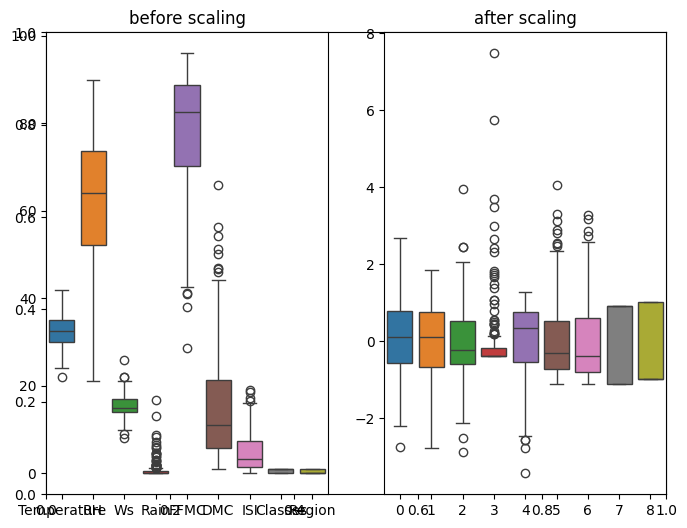

In [22]:
##box plot to understand of effect of standard scaler
plt.subplots(figsize=(8,6))
plt.subplot(121)
sns.boxplot(x_train)
plt.title("before scaling")

plt.subplot(122)
sns.boxplot(x_train_scaled)
plt.title("after scaling")

# Linear Regression

0.5468236465249978
0.9847657384266951


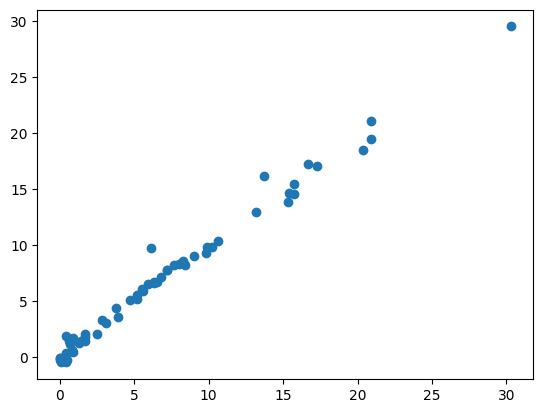

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

linregress=LinearRegression()
linregress.fit(x_train_scaled,y_train)
y_pred=linregress.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print(mae)
print(score)

plt.scatter(y_test,y_pred)

# Lasso regression

1.133175994914409
0.9492020263112388


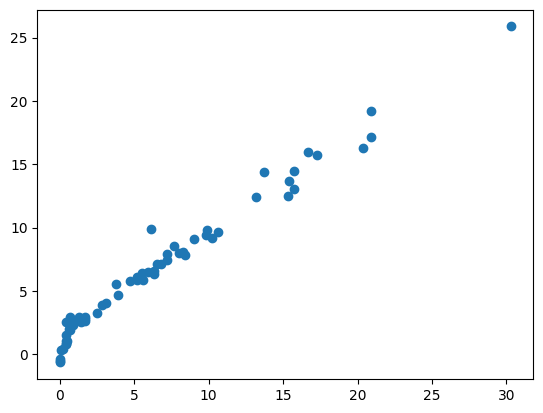

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print(mae)
print(score)

plt.scatter(y_test,y_pred)

In [25]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [26]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [27]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [28]:
lassocv.predict(x_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [29]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

0.619970115826343
0.9820946715928275


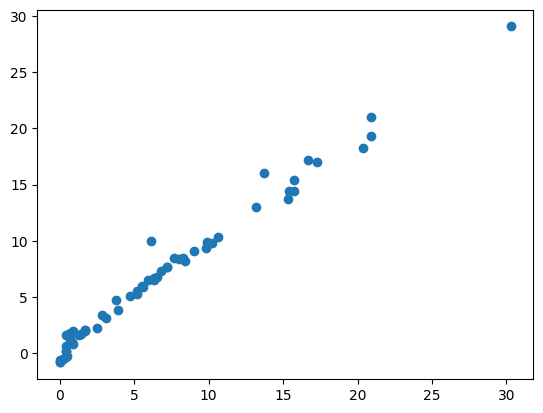

In [30]:
y_pred_lassocv=lassocv.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred_lassocv)
mae=mean_absolute_error(y_test,y_pred_lassocv)
score=r2_score(y_test,y_pred_lassocv)

print(mae)
print(score)

plt.scatter(y_test,y_pred_lassocv)

# Ridge Regression

0.5642305340105715
0.9842993364555512


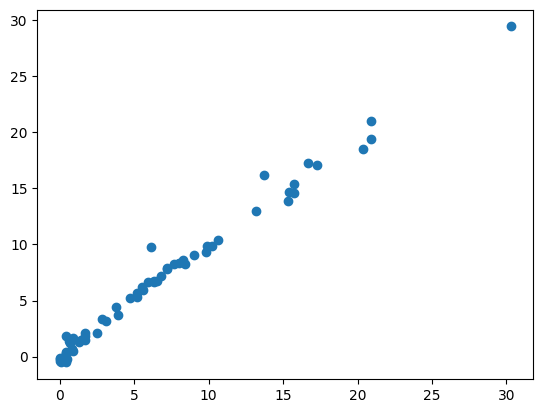

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print(mae)
print(score)

plt.scatter(y_test,y_pred)

0.5642305340105715
0.9842993364555512


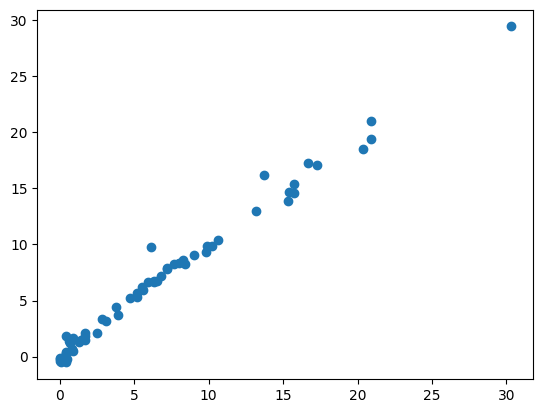

In [32]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred_ridgecv=ridgecv.predict(x_test_scaled)

mse=mean_squared_error(y_test,y_pred_ridgecv)
mae=mean_absolute_error(y_test,y_pred_ridgecv)
score=r2_score(y_test,y_pred_ridgecv)

print(mae)
print(score)

plt.scatter(y_test,y_pred_ridgecv)

In [33]:
ridgecv.alphas,ridgecv.alpha_

((0.1, 1.0, 10.0), np.float64(1.0))

In [34]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# elastic net Regression

1.8822353634896005
0.8753460589519703


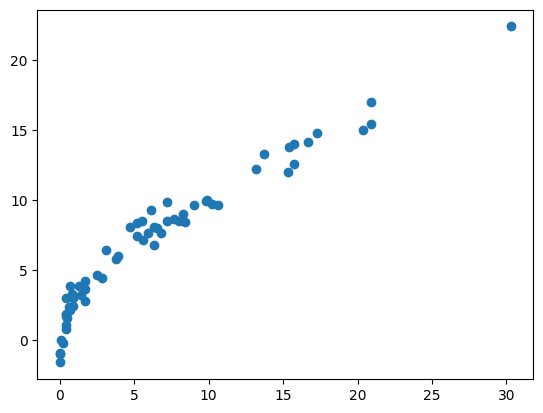

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

elstic=ElasticNet()
elstic.fit(x_train_scaled,y_train)
y_pred=elstic.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print(mae)
print(score)

plt.scatter(y_test,y_pred) 

0.6575946731430898
0.9814217587854941


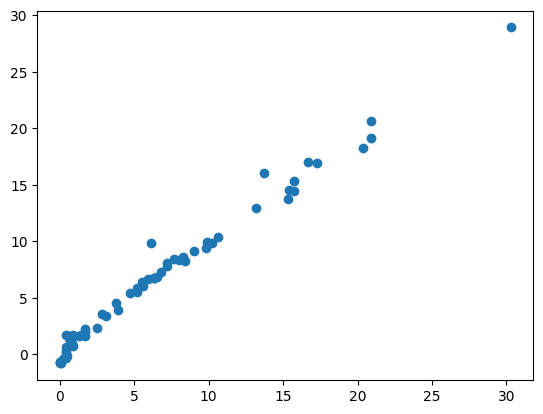

In [36]:
from sklearn.linear_model import ElasticNetCV
elastCV=ElasticNetCV(cv=5)
elastCV.fit(x_train_scaled,y_train)
y_pred_elastCV=elastCV.predict(x_test_scaled)

mse=mean_squared_error(y_test,y_pred_elastCV)
mae=mean_absolute_error(y_test,y_pred_elastCV)
score=r2_score(y_test,y_pred_elastCV)

print(mae)
print(score)

plt.scatter(y_test,y_pred_elastCV)

In [37]:
elastCV.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [38]:
## pickle the ml model , preprocessing standard model


In [39]:
scaler

StandardScaler()

In [40]:
ridge

Ridge()

In [41]:
import pickle

In [42]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
